In [1]:
from airLibs import plotting as aplt
import numpy as np
from airLibs import runOpenFoam as of
from airLibs import runF2w as f2w

from airLibs import airfoil as af
from airLibs import runXFoil as xf

import os

In [2]:
AoAmax = 15
AoAmin = -6
NoAoA = (AoAmax - AoAmin) * 2 + 1
angles = np.linspace(AoAmin, AoAmax, NoAoA)
Reyn = 346153  # np.logspace(3,6,20)
MACH = 0.03

In [3]:
CASE = "Rudder"
os.chdir(CASE)
casedir = os.getcwd()

In [4]:
for i in os.listdir():
    if i.startswith("naca"):
        airfile = i
airfoil = airfile[4:]

In [5]:
clcdcmFW = f2w.makeCLCD(Reyn, MACH, angles)
clcdcmXF = xf.runXFoil(Reyn, MACH, angles, airfoil)
clcdcmOF = of.makeCLCD(angles)

OK
0.03


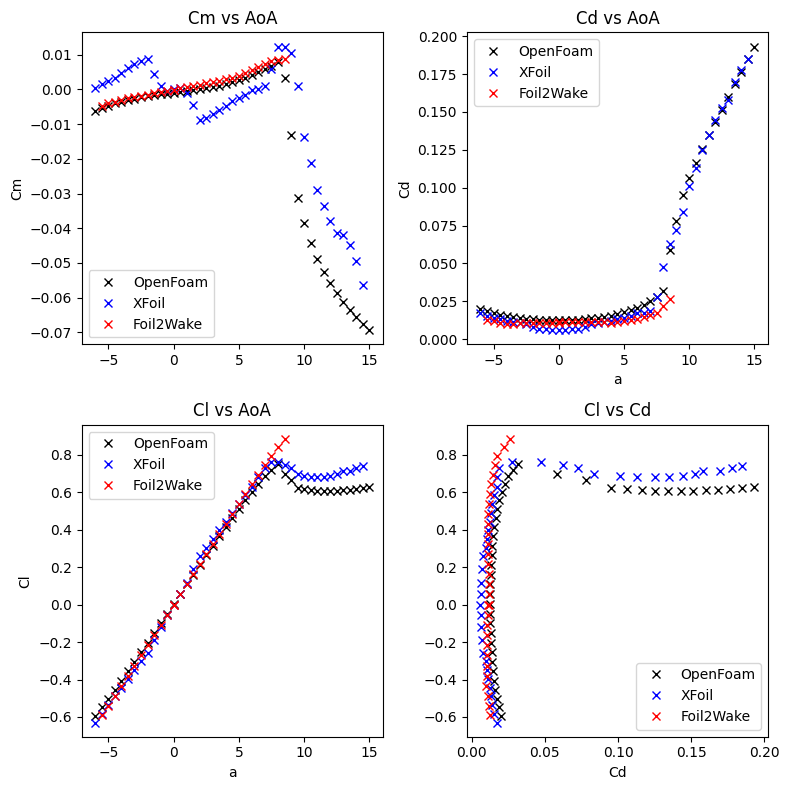

In [6]:
f2w = [clcdcmFW, "rx", "Foil2Wake"]
openF = [clcdcmOF, "kx", "OpenFoam"]
Xfoil = [clcdcmXF, "bx", "XFoil"]
aplt.plotAeorCoeffs([openF,Xfoil, f2w])
